# Building Unimodal Image Modal

In [1]:
cd ..

/notebooks/MultimodalTweetsClassification


In [2]:
#ensuring that any edits to libraries you make are reloaded here automatically
#to ensuere charts or images displayed are shown in this notebook
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
#importing required modules
from exp.Required_Modules_And_Packages import *
from exp.Data_Reading_And_Preprocessing import *
from exp.Required_Integration_Functionalities_For_Transformer_To_Fastai import *
from exp.Required_Functionalities_To_Handal_Multimodal_Dataset import *
from exp.Multimodal_Model_With_Intermediate_Or_EmbraceNet_Fusion import *

In [4]:
path = Path('/notebooks/MultimodalTweetsClassification')
# path.ls()

In [5]:
path_img = path/'data_image'

In [6]:
# Uncomment the code if dataset and labels are in .tar.gz and .zip format respectively

# data = "CrisisMMD_v2.tar.gz"
# agreed_label = "crisismmd_datasplit_agreed_label.zip"
# untar_data_and_unzip_label(data,agreed_label)

In [7]:
#reading csv files and doing initial necessary processing
data_human_image,test_data_human_image = get_dataframe(*get_tsv_data_files('humanitarian_task_tsv_files'),path)

reading data and preprocessing it.....
done!!


In [8]:
print(f"shape of data: {data_human_image.shape}\n")
print(f"train set: {data_human_image['is_valid'].value_counts()[0]}")
print(f"valid set: {data_human_image['is_valid'].value_counts()[1]}")      
print("="*50)
print(f"shape of test data: {test_data_human_image.shape}\n")

shape of data: (7124, 10)

train set: 6126
valid set: 998
shape of test data: (955, 9)



In [9]:
data_human_image.head()

event_name            tweet_id              image_id  \
0  california_wildfires  917793137925459968  917793137925459968_0   
1  california_wildfires  917793137925459968  917793137925459968_1   
2  california_wildfires  917793137925459968  917793137925459968_2   
3  california_wildfires  917815040962695168  917815040962695168_2   
4  california_wildfires  917828283047260161  917828283047260161_0   

                                          tweet_text  \
0  california wildfires destroy more than structu...   
1  california wildfires destroy more than structu...   
2  california wildfires destroy more than structu...   
3     photos of california destructive wildfires via   
4     why california wildfires are worse in the fall   

                                               image  \
0  data_image/california_wildfires/10_10_2017/917...   
1  data_image/california_wildfires/10_10_2017/917...   
2  data_image/california_wildfires/10_10_2017/917...   
3  data_image/california_wildfires/10_10_2017/917...   
4  data_image/california_wildfires/10_10_2017/917...   

                               label                         label_text  \
0  infrastructure_and_utility_damage  infrastructure_and_utility_damage   
1  infrastructure_and_utility_damage  infrastructure_and_utility_damage   
2  infrastructure_and_utility_damage  infrastructure_and_utility_damage   
3  infrastructure_and_utility_damage  infrastructure_and_utility_damage   
4         other_relevant_information         other_relevant_information   

                         label_image label_text_image  is_valid  
0  infrastructure_and_utility_damage         Positive     False  
1  infrastructure_and_utility_damage         Positive     False  
2  infrastructure_and_utility_damage         Positive     False  
3  infrastructure_and_utility_damage         Positive     False  
4         other_relevant_information         Positive     False

In [10]:
test_data_human_image.head()

event_name            tweet_id              image_id  \
0   hurricane_harvey  905952332923338752  905952332923338752_0   
1  mexico_earthquake  912022130396672000  912022130396672000_0   
2    hurricane_maria  927758858776465408  927758858776465408_0   
3   hurricane_harvey  907654309587779584  907654309587779584_0   
4    hurricane_maria  913745586104528898  913745586104528898_0   

                                          tweet_text  \
0  has great event tomorrow for both byu and utah...   
1  now also carlo surf band at pm pwyc mexicoeart...   
2  guaynabo resident efrain diaz stands by bridge...   
3  after harvey irma leaves its own trail of dest...   
4  dawn just won and we re gonna match the amount...   

                                               image  \
0  data_image/hurricane_harvey/8_9_2017/905952332...   
1  data_image/mexico_earthquake/24_9_2017/9120221...   
2  data_image/hurricane_maria/7_11_2017/927758858...   
3  data_image/hurricane_harvey/12_9_2017/90765430...   
4  data_image/hurricane_maria/29_9_2017/913745586...   

                                    label  \
0  rescue_volunteering_or_donation_effort   
1                        not_humanitarian   
2       infrastructure_and_utility_damage   
3              other_relevant_information   
4                        not_humanitarian   

                               label_text  \
0  rescue_volunteering_or_donation_effort   
1                        not_humanitarian   
2       infrastructure_and_utility_damage   
3              other_relevant_information   
4                        not_humanitarian   

                              label_image label_text_image  
0  rescue_volunteering_or_donation_effort         Positive  
1                        not_humanitarian         Positive  
2       infrastructure_and_utility_damage         Positive  
3              other_relevant_information         Positive  
4                        not_humanitarian         Positive

In [11]:
#creating image databunch object for data(train and dev split) and test data(test split)
data_img = get_image_data(data_human_image,path,224)
test_data_img = get_test_image_data(test_data_human_image,path,224)

In [12]:
# making single databunch object of data and test data
data_img.add_test(test_data_img.x)
data_img.test_ds.y = test_data_img.y

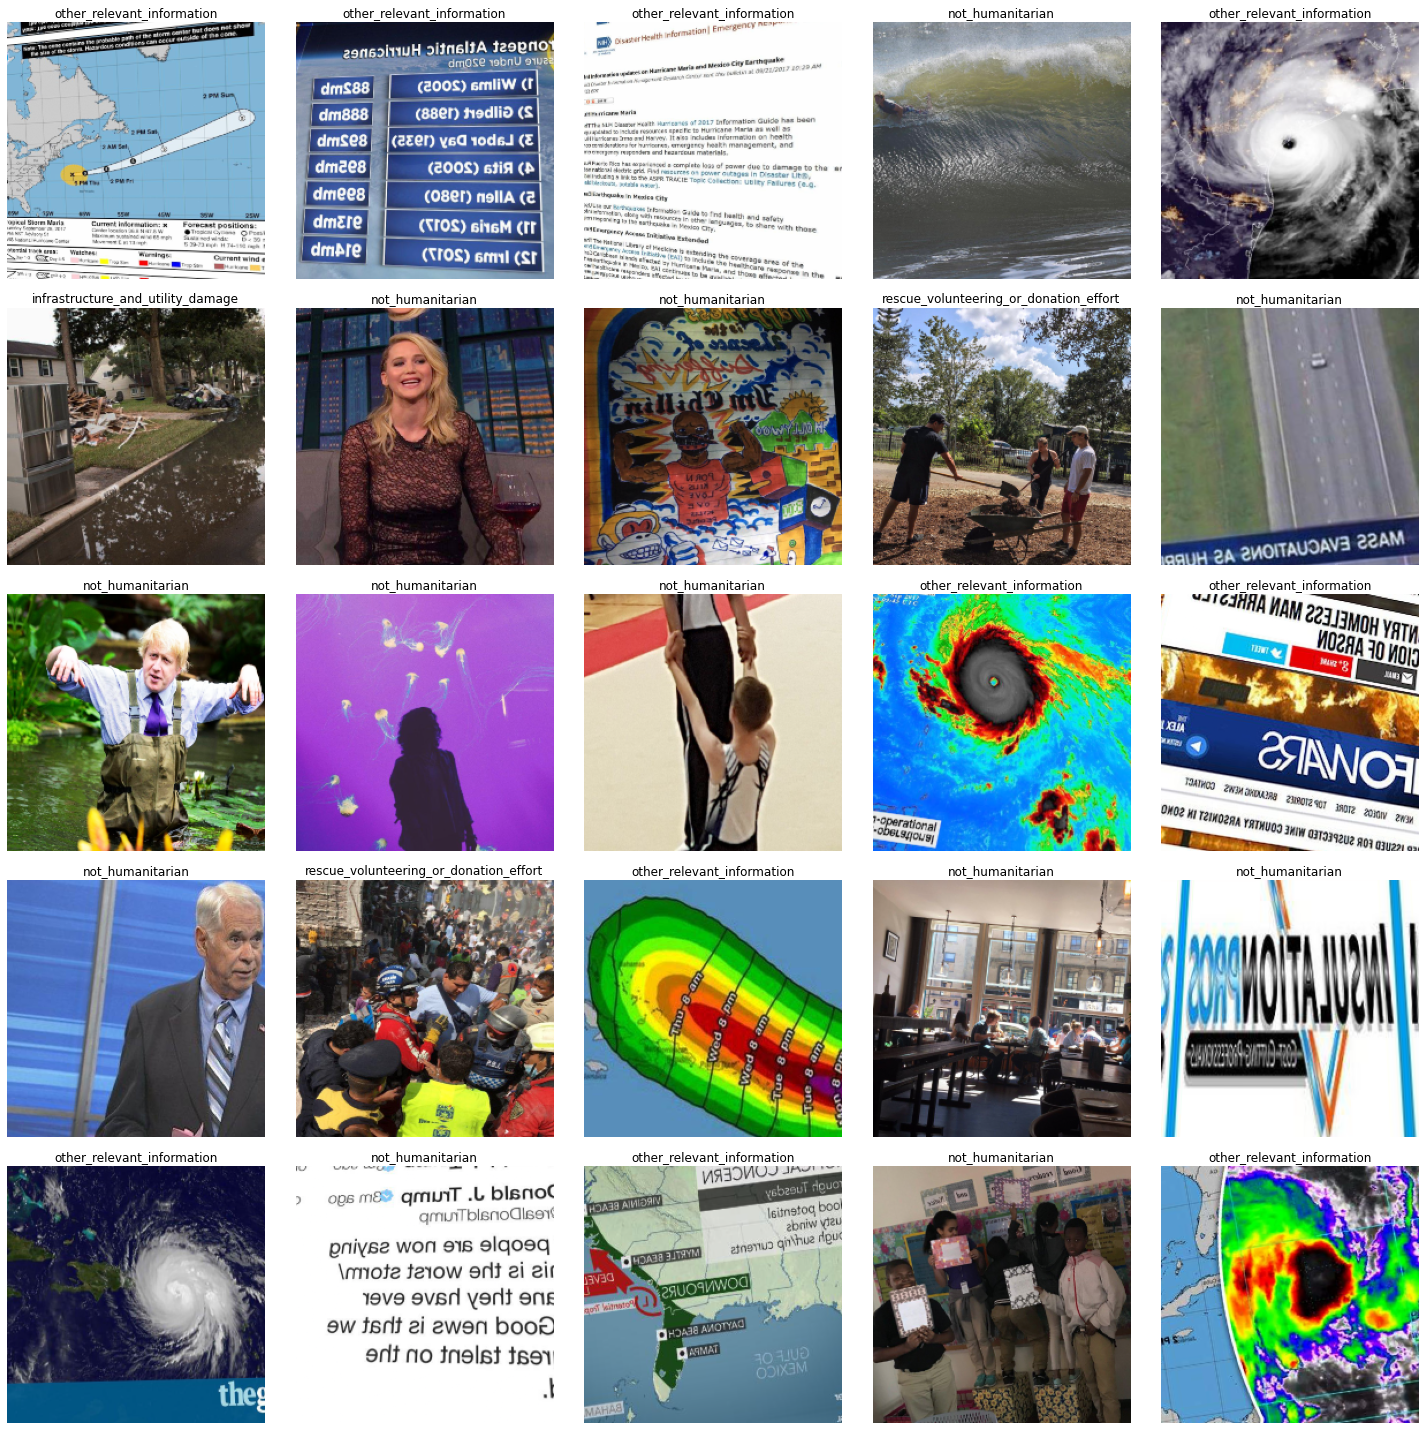

In [13]:
data_img.show_batch()

In [14]:
#creating learner object with callbacks
arch = models.resnet50
learn_img = cnn_learner(data_img, arch, metrics=[accuracy,Precision1(average='macro'),
                Precision1(average='weighted'),Recall(average='macro'),Recall(average='weighted'),
               FBeta(average='macro',beta=1.),FBeta(average='weighted',beta=1.)],
            callback_fns=[ShowGraph,partial(EarlyStoppingCallback, monitor='accuracy', min_delta=0.01, patience=3),
               partial(ReduceLROnPlateauCallback,monitor='accuracy', mode='auto', patience=0,
                       factor=0.2, min_delta=0, min_lr=0.000001)])

In [16]:
# training model using discriminative fine-tunnig and gradual unfreezing
learn_img.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


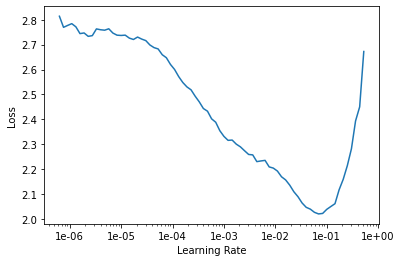

In [17]:
learn_img.recorder.plot()

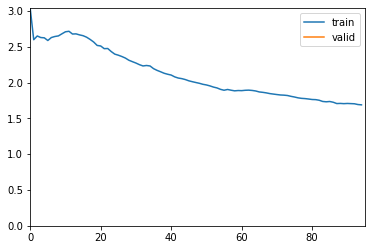

In [22]:
lr = 0.0001
learn_img.fit_one_cycle(3, slice(lr))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


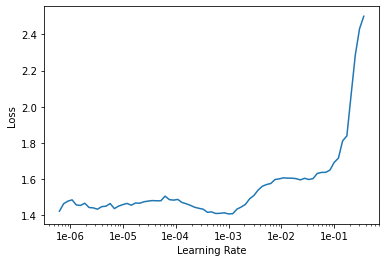

In [23]:
learn_img.unfreeze()
learn_img.lr_find()
learn_img.recorder.plot()

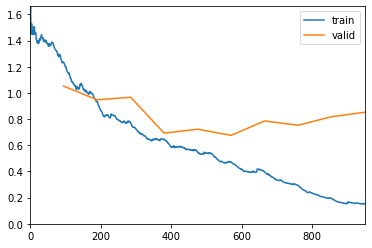

Epoch 2: reducing lr to 0.00020000000000000006
Epoch 4: reducing lr to 0.00016234913078995265
Epoch 6: reducing lr to 7.774839561274217e-05
Epoch 7: reducing lr to 3.7651669210047406e-05
Epoch 8: reducing lr to 9.90387359730526e-06
Epoch 9: early stopping


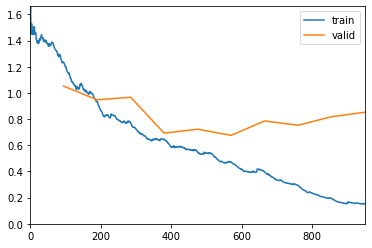

In [24]:
learn_img.fit_one_cycle(10, slice(1e-4, 1e-3),
                       callbacks=[SaveModelCallback(learn_img,every='improvement', monitor='accuracy', name='best')])

In [31]:
learn_img.validate(data_img.valid_dl,metrics=[accuracy,Precision(average='macro'),Precision(average='weighted'),
                                                 Recall(average='macro'),Recall(average='weighted'),
                                                 FBeta(average='macro',beta=1.),FBeta(average='weighted',beta=1.)])

[0.8526743,
 tensor(0.7816),
 tensor(0.6441),
 tensor(0.7826),
 tensor(0.6165),
 tensor(0.7816),
 tensor(0.6236),
 tensor(0.7782)]

In [32]:
# making interpretation on dev split
interp = ClassificationInterpretation.from_learner(learn_img)

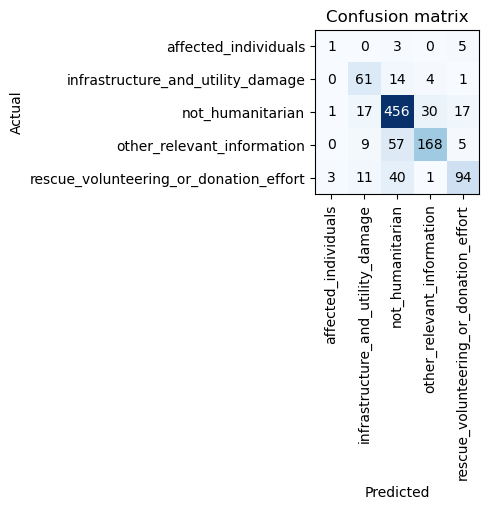

In [33]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=100)

In [34]:
#making predictions on dev set to use it for classification report
preds,y,losses = learn_img.get_preds(with_loss=True)
y_preds = preds.argmax(1)

In [35]:
target_names = ['affected_individuals',
 'infrastructure_and_utility_damage',
 'not_humanitarian',
 'other_relevant_information',
 'rescue_volunteering_or_donation_effort']

print(classification_report(y, y_preds, target_names=target_names))

                                        precision    recall  f1-score   support

                  affected_individuals       0.20      0.11      0.14         9
     infrastructure_and_utility_damage       0.62      0.76      0.69        80
                      not_humanitarian       0.80      0.88      0.84       521
            other_relevant_information       0.83      0.70      0.76       239
rescue_volunteering_or_donation_effort       0.77      0.63      0.69       149

                              accuracy                           0.78       998
                             macro avg       0.64      0.62      0.62       998
                          weighted avg       0.78      0.78      0.78       998



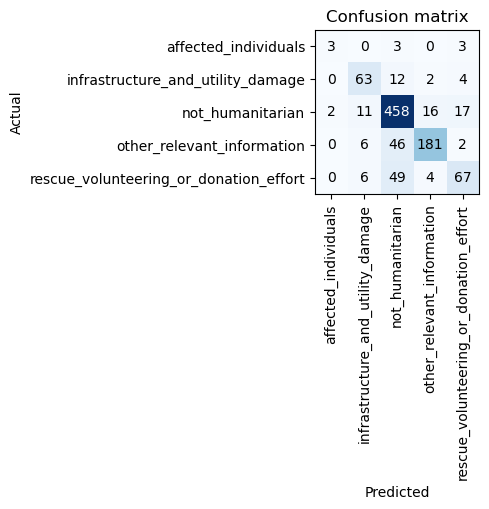

In [36]:
#making interpretation on test split
interp = ClassificationInterpretation.from_learner(learn_img,ds_type=DatasetType.Test)
interp.plot_confusion_matrix(figsize=(5,5), dpi=100)

In [37]:
#making predictions on test set to use it for classification report
preds,y,losses = learn_img.get_preds(ds_type=DatasetType.Test,with_loss=True)
y_preds = preds.argmax(1)

In [38]:
print(classification_report(y, y_preds, target_names=target_names))

                                        precision    recall  f1-score   support

                  affected_individuals       0.60      0.33      0.43         9
     infrastructure_and_utility_damage       0.73      0.78      0.75        81
                      not_humanitarian       0.81      0.91      0.85       504
            other_relevant_information       0.89      0.77      0.83       235
rescue_volunteering_or_donation_effort       0.72      0.53      0.61       126

                              accuracy                           0.81       955
                             macro avg       0.75      0.66      0.70       955
                          weighted avg       0.81      0.81      0.80       955

